In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Folder where all the demonstration files are stored
folder_path = '/home/yigit/projects/pemp/data/ur10/raw/'

# Initialize an empty DataFrame to store combined data
all_data = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # Load the CSV file
        data = pd.read_csv(file_path).to_numpy()

        all_data.append(data)

Text(0.5, 1.0, 'Bottle-Cap Demonstration Data')

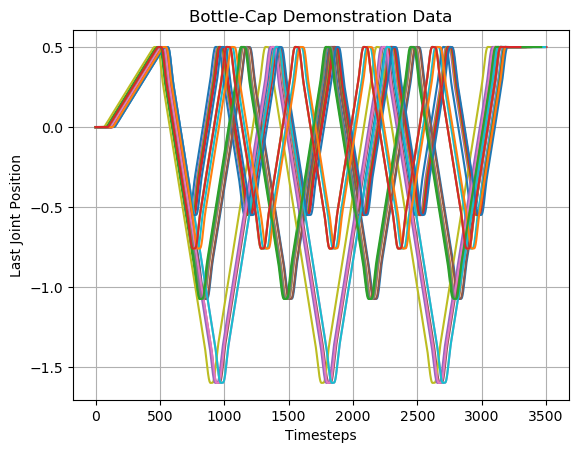

In [2]:
plt.grid()
num_trajs = len(all_data)

for i in range(num_trajs):
    plt.plot(all_data[i][:, -1])

plt.xlabel('Timesteps')
plt.ylabel('Last Joint Position')
plt.title('Bottle-Cap Demonstration Data')

In [3]:
# downsample each all_data to 3000 points

trimmed_data = np.zeros((num_trajs, 3000, 7))  # 3000 timesteps, 7 joints

for i in range(num_trajs):
    idx = np.linspace(0, len(all_data[i])-1, 3000, dtype=int)
    trimmed_data[i] = all_data[i][idx, -7:]

# save the trimmed data
np.save('processed/full_3000.npy', trimmed_data)

In [4]:
t_steps = 2500
turning_data = np.zeros((num_trajs, t_steps, 7))  # 2500 timesteps, 7 joints
max_turns = np.zeros(num_trajs)

for i in range(num_trajs):
    start_found = False
    end_found = False
    start_idx = 0
    end_idx = 0
    max_turn = -10
    for j in range(450, 550):
        if not start_found:
            if all_data[i][j, -1] > max_turn:
                max_turn = all_data[i][j, -1]
                start_idx = j
            else:
                start_found = True
    max_turns[i] = max_turn
    max_turn = -10
    for j in range(3000, 3200):
        if not end_found:
            if all_data[i][j, -1] > max_turn:
                max_turn = all_data[i][j, -1]
                end_idx = j
            else:
                end_found = True
                break
    idx = np.linspace(start_idx, end_idx, t_steps, dtype=int)
    turning_data[i] = all_data[i][idx, -7:]
turning_data /= np.pi  #            ***********NORMALIZATION***********

# save turning data
np.save(f'processed/turning_{t_steps}.npy', turning_data)

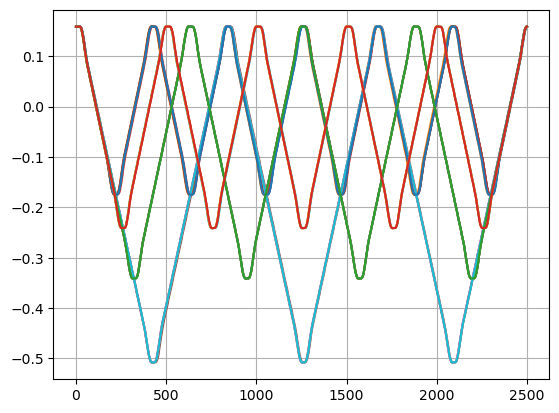

In [5]:
for i in range(num_trajs):
    plt.plot(turning_data[i][:, -1])
plt.grid()

In [59]:
freqs = np.zeros(num_trajs)
for i in range(num_trajs):
    for j in range(100, t_steps):
        if turning_data[i][j, -1] > max_turns[i]-0.01 and turning_data[i][j-1, -1] < max_turns[i]-0.01:
            freqs[i] += 1

In [71]:
np.save('processed/freqs.npy', freqs)